In [3]:
# Reload modules automatically
# https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2
%matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from utils import ExperimentManager

import matplotlib.pyplot as plt
import numpy as np

gcn_exp = dict(
    label = "GCN",
    collection = "rob_csbm_gcn",
    start_id = 1,
    end_id = 320,
    n_seeds = 10,
)
appnp_exp = dict(
    label = "APPNP",
    collection = "rob_csbm_appnp",
    start_id = 1,
    end_id = 320,
    n_seeds = 10,
)
gat_exp = dict(
    label = "GAT",
    collection = "rob_csbm_gat",
    start_id = [1, 301],
    end_id = [180, 440],
    n_seeds = 10,
)
gatv2_exp = dict(
    label = "GATv2",
    collection = "rob_csbm_gatv2",
    start_id = [1, 241],
    end_id = [180, 380],
    n_seeds = 10,
)
graphsage_exp = dict(
    label = "GraphSAGE",
    collection = "rob_csbm_graphsage",
    start_id = 1,
    end_id = 320,
    n_seeds = 10,
)
sgc_exp = dict(
    label="SGC",
    collection="rob_csbm_sgc",
    start_id = 1,
    end_id = 320,
    n_seeds = 10,
)
lp_exp = dict(
    label = "LP",
    collection = "rob_csbm_lp",
    start_id = 1,
    end_id = 320,
    n_seeds = 10,
)
mlp_exp = dict(
    label = "MLP",
    collection = "rob_csbm_mlp",
    start_id = [1, 251],
    end_id = [240, 330],
    n_seeds = 10,
)
gcn_lp_exp = dict(
    label = "GCN+LP",
    collection = "rob_csbm_gcn_lp",
    start_id = 1,
    end_id = 320,
    n_seeds = 10,
)
lineargcn_lp_exp = dict(
    label="LinearGCN",
    collection="rob_csbm_lineargcn",
    start_id = 1,
    end_id = 300,
    n_seeds = 10,
)
sgc_lp_exp = dict(
    label="SGC+LP",
    collection="rob_csbm_sgc_lp",
    start_id = 1,
    end_id = 320,
    n_seeds = 10,
)
appnp_lp_exp = dict(
    label = "APPNP+LP",
    collection = "rob_csbm_appnp_lp",
    start_id = 1,
    end_id = 320,
    n_seeds = 10,
)
gat_lp_exp = dict(
    label = "GAT+LP",
    collection = "rob_csbm_gat_lp",
    start_id = 1,
    end_id = 320,
    n_seeds = 10,
)
gatv2_lp_exp = dict(
    label = "GATv2+LP",
    collection = "rob_csbm_gatv2_lp",
    start_id = 1,
    end_id =  320,
    n_seeds = 10,
)
graphsage_lp_exp = dict(
    label = "GraphSAGE+LP",
    collection = "rob_csbm_graphsage_lp",
    start_id = 1,
    end_id = 320,
    n_seeds = 10,
)
mlp_lp_exp = dict(
    label = "MLP+LP",
    collection = "rob_csbm_mlp_lp",
    start_id = 1,
    end_id = 320,
    n_seeds = 10,
)

In [5]:
#This notebook is used to analyse the over- and under-robustness of models. 
Ks = [0.1, 0.5, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0]

experiments = [mlp_exp,
               gcn_exp,
               #lineargcn_exp,
               sgc_exp,
               appnp_exp,
               gat_exp, 
               gatv2_exp, 
               graphsage_exp,
               lp_exp, 
               mlp_lp_exp,
               gcn_lp_exp,
               appnp_lp_exp, 
               #lineargcn_lp_exp,
               sgc_lp_exp,
               gatv2_lp_exp,
               gat_lp_exp,
               graphsage_lp_exp,
               ]
experiment_manager = ExperimentManager(experiments)

/nfs/homedirs/gosl/src/csbm/notebooks/robustness/utils.py:1379: UserWarning: FixedFormatter should only be used together with FixedLocator
  bbox_to_anchor=(1, 0.5), frameon=False, fontsize=12)


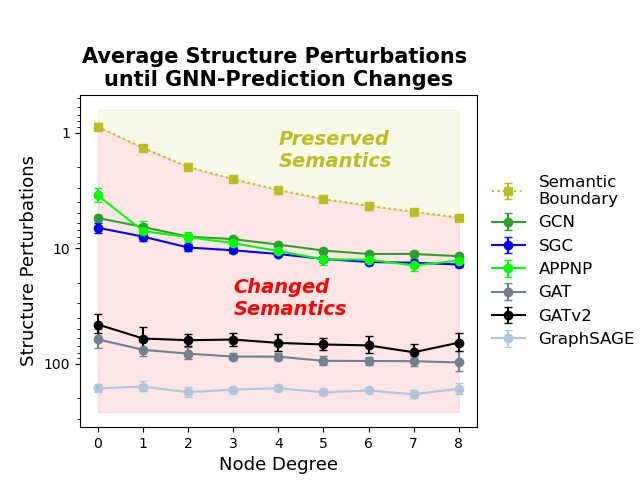

In [101]:
models = ["GCN", "APPNP", "SGC", "GAT", "GATv2", "GraphSAGE"]
ylabel = "Structure Perturbations"
K = 1.5
title = f"Average Structure Perturbations \nuntil GNN-Prediction Changes"
bayes_label = "Semantic\nBoundary"
experiment_manager.starplot(name="f_wrt_y", attack="l2-weak", models=models, 
                            max_degree=8,
                            logplot=True, 
                            K=K, 
                            errorbars=True, 
                            title=title, 
                            ylabel=ylabel,
                            bayes_label = bayes_label)

In [7]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

/nfs/homedirs/gosl/src/csbm/notebooks/robustness/utils.py:791: UserWarning: FixedFormatter should only be used together with FixedLocator
  #ax.set_xticklabels(ax.get_xticks(), fontsize=13)


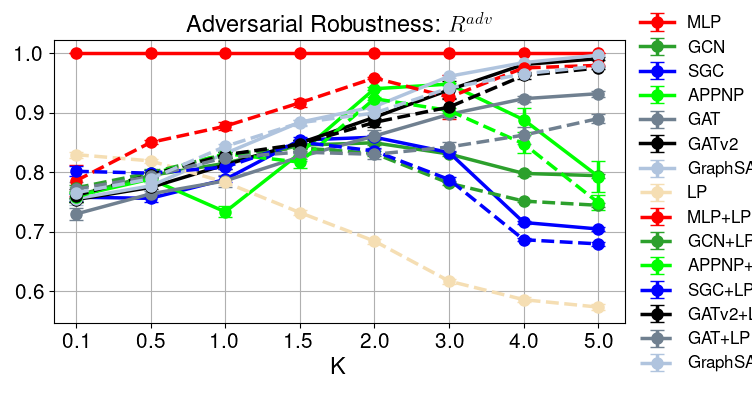

In [51]:
models = ["GCN", "GAT", "GATv2", "SGC", "MLP", "GraphSAGE", "APPNP", "LP", "APPNP+LP","GCN+LP", "GAT+LP", "GATv2+LP","MLP+LP", "GraphSAGE+LP", "SGC+LP"]
#models = ["GCN", "GAT", "GATv2", "SGC", "MLP", "GraphSAGE", "APPNP", "LP"]
#models = ["GCN"]
ylabel = r""
title = r"Adversarial Robustness: $R^{adv}$"
experiment_manager.plot(name="adversarial-robustness", attack="random", models=models, 
                        errorbars=True, title=title, spacing="even", ylabel=ylabel,
                        legend_loc="lower left", legend_cols=1, width = 0.86, budget="deg+0",
                        titlefont=17, fontweight="normal",
                        K_l=[0.1, 0.5, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0])

/nfs/homedirs/gosl/src/csbm/notebooks/robustness/utils.py:791: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f"{round(i, 1):.1f}" for i in ax.get_yticks()], fontsize=15, fontweight="bold")


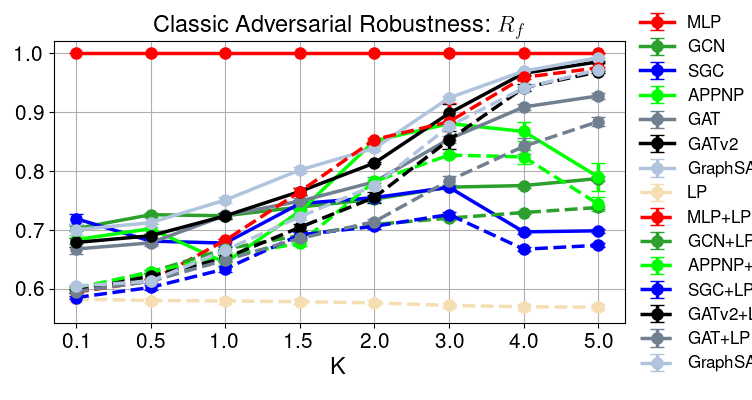

In [56]:
title = r"Classic Adversarial Robustness: $R_{f}$"
ylegend = ""
experiment_manager.plot(name="f_wrt_y", attack="random", models=models, 
                        errorbars=True, title=title, spacing="even", 
                        legend_loc="lower left", legend_cols=1, ylabel=ylegend,
                        budget="deg+0", titlefont=17, fontweight="normal",
                        K_l=[0.1, 0.5, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0])

/nfs/homedirs/gosl/src/csbm/notebooks/robustness/utils.py:774: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f"{round(i, 1):.1f}" for i in ax.get_yticks()], fontsize=15, fontweight="bold")


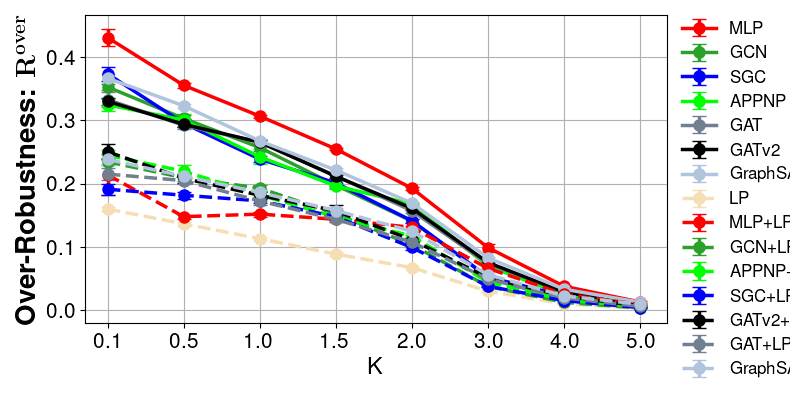

In [133]:
models = ["GCN", "GAT", "GATv2", "SGC", "MLP", "GraphSAGE", "APPNP", "LP", "APPNP+LP","GCN+LP", "GAT+LP", "GATv2+LP","MLP+LP", "GraphSAGE+LP", "SGC+LP"]
#models = ["GCN", "GAT", "GATv2", "SGC", "MLP", "GraphSAGE", "APPNP", "LP"]
#models = ["GCN"]
ylabel = r"\textbf{Over-Robustness:} $\mathbf{R^{over}}$"
title = r"" #$\mathbf{R^{over}}$ 
experiment_manager.plot(name="over-robustness-v2", attack="l2-weak", models=models, 
                        errorbars=True, title=title, spacing="even", ylabel=ylabel,
                        legend_loc="lower left", legend_cols=1, width = 0.86,
                        budget="deg+0",
                        K_l=[0.1, 0.5, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0])

/nfs/homedirs/gosl/src/csbm/notebooks/robustness/utils.py:910: UserWarning: FixedFormatter should only be used together with FixedLocator
  x = x[x <= max_degree]


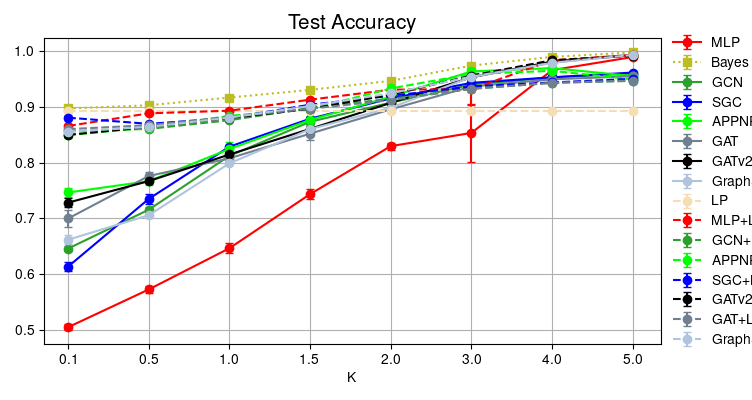

In [146]:
models = ["GCN", "GAT", "BC", "GATv2", "SGC", "MLP", "GraphSAGE", "APPNP", "LP", "APPNP+LP","GCN+LP", "GAT+LP", "GATv2+LP","MLP+LP", "GraphSAGE+LP", "SGC+LP"]
#models = ["GCN", "GAT", "GATv2", "SGC", "MLP", "GraphSAGE", "APPNP", "LP"]
#models = ["GCN"]
ylabel = r""
title = r"Test Accuracy" #$\mathbf{R^{over}}$ 
experiment_manager.plot_normal(name="test-accuracy", attack="l2-weak", models=models, 
                        errorbars=True, title=title, spacing="even", ylabel=ylabel,
                        legend_loc="lower left", legend_cols=1, width = 0.86,
                        K_l=[0.1, 0.5, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0])

In [80]:

for label, K, exp in experiment_manager.experiment_iterator("l2-weak", "GCN", [0.1, 0.5]):  
    avg_g_wrt_y = exp.robustness_statistics["avg_avg_bayes_robust_when_both"]
    std_g_wrt_y = exp.robustness_statistics["std_avg_bayes_robust_when_both"]
    print(f"{avg_g_wrt_y}")

{'4': 2.3960308795136642, '5': 3.0905389594885513, '7': 4.20898273546793, '3': 1.7937057041718165, '2': 1.2766477621752856, '1': 0.5485416344058904, '6': 3.623826532858854, '8': 4.782526961342751, '10': 6.18915343915344, '0': 0.0, '9': 5.382561327561328, '11': 7.527777777777778, '12': 4.5, '14': 8.5}
{'4': 2.527297700875444, '7': 4.37435007519411, '3': 1.9297094648319262, '2': 1.3796583440742134, '1': 0.7087301042059653, '6': 3.700007122143988, '5': 3.2066759887361145, '10': 6.140211640211641, '0': 0.0, '8': 4.929269675574024, '9': 5.481886724386724, '11': 7.523809523809524, '12': 4.5, '14': 8.5}


In [78]:

df = experiment_manager.get_value_in_table(name="g_wrt_y", attack="l2-weak", models=["BC"], 
                        use_mean=True, use_std=False,
                        K_l=[0.1, 0.5, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0])
print(df.to_latex())

\begin{tabular}{l}
\toprule
Empty DataFrame
Columns: Index([], dtype='object')
Index: Index([], dtype='object') \\
\bottomrule
\end{tabular}



In [17]:
#models = ["GCN", "GAT", "GATv2", "SGC", "MLP", "GraphSAGE", "APPNP", "LP", "APPNP+LP","GCN+LP", "GAT+LP", "GATv2+LP","MLP+LP", "GraphSAGE+LP", "SGC+LP"]
#models = ["SGC", "MLP"]#, "GATv2", "GATv2+LP", "GraphSAGE", "GraphSAGE+LP"]
models = ["MLP"]
title = r"Adversarial Robustness $\frac{R_{f|g}}{R_{g}}$"
ylabel = "\% of optimal (Bayes) robustness achieved"
for budget in [1, 2, 3, 4, "deg+0", "deg+2"]:
    print(f"Budget: {budget}")
    df = experiment_manager.get_value_in_table(name="g_wrt_y", attack="l2-weak", models=models, 
                            budget=budget, use_mean=True, use_std=False,
                            K_l=[0.1, 0.5, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0])
    print(df.to_latex())

Budget: 1
\begin{tabular}{lllllllll}
\toprule
{} &   0.1 &   0.5 &  1.0 &  1.5 &  2.0 &  3.0 &  4.0 &  5.0 \\
\midrule
MLP &  14.9 &  10.9 &  9.0 &  6.2 &  4.3 &  2.1 &  0.6 &  0.2 \\
\bottomrule
\end{tabular}

Budget: 2
\begin{tabular}{lllllllll}
\toprule
{} &   0.1 &   0.5 &   1.0 &   1.5 &   2.0 &  3.0 &  4.0 &  5.0 \\
\midrule
MLP &  36.8 &  31.4 &  26.2 &  19.7 &  13.8 &  6.4 &  2.0 &  0.6 \\
\bottomrule
\end{tabular}

Budget: 3
\begin{tabular}{lllllllll}
\toprule
{} &   0.1 &   0.5 &   1.0 &   1.5 &   2.0 &   3.0 &  4.0 &  5.0 \\
\midrule
MLP &  58.6 &  52.9 &  46.4 &  37.7 &  28.8 &  13.9 &  5.0 &  1.3 \\
\bottomrule
\end{tabular}

Budget: 4
\begin{tabular}{lllllllll}
\toprule
{} &   0.1 &   0.5 &   1.0 &   1.5 &   2.0 &   3.0 &  4.0 &  5.0 \\
\midrule
MLP &  77.1 &  72.6 &  66.6 &  57.0 &  45.8 &  25.8 &  9.6 &  2.9 \\
\bottomrule
\end{tabular}

Budget: deg+0
\begin{tabular}{lllllllll}
\toprule
{} &   0.1 &   0.5 &   1.0 &   1.5 &   2.0 &   3.0 &  4.0 &  5.0 \\
\midrule
MLP &  

In [158]:
models = ["GCN", "GAT", "GATv2", "SGC", "MLP", "GraphSAGE", "APPNP", "LP", "APPNP+LP","GCN+LP", "GAT+LP", "GATv2+LP","MLP+LP", "GraphSAGE+LP", "SGC+LP"]
#models = ["SGC", "MLP"]#, "GATv2", "GATv2+LP", "GraphSAGE", "GraphSAGE+LP"]
title = r"Adversarial Robustness $\frac{R_{f|g}}{R_{g}}$"
ylabel = "\% of optimal (Bayes) robustness achieved"
df = experiment_manager.get_value_in_table(name="over-robustness-v2", attack="random", models=models, 
                        budget="deg+0",
                        K_l=[0.1, 0.5, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0])
print(df.to_latex())

\begin{tabular}{lllllllll}
\toprule
{} &    0.1 &    0.5 &    1.0 &    1.5 &    2.0 &    3.0 &   4.0 &   5.0 \\
\midrule
MLP          &  43.6\% &  35.0\% &  30.8\% &  25.0\% &  18.8\% &  10.0\% &  3.5\% &  1.1\% \\
GCN          &  34.0\% &  29.2\% &  23.2\% &  16.8\% &  11.1\% &   3.4\% &  0.9\% &  0.3\% \\
SGC          &  37.2\% &  28.9\% &  21.3\% &  16.5\% &  10.7\% &   3.3\% &  0.9\% &  0.2\% \\
APPNP        &  31.1\% &  27.8\% &  22.7\% &  17.2\% &  13.6\% &   4.3\% &  1.7\% &  0.8\% \\
GAT          &  32.9\% &  27.9\% &  25.7\% &  19.2\% &  13.1\% &   5.7\% &  2.2\% &  0.7\% \\
GATv2        &  31.2\% &  27.8\% &  23.6\% &  18.7\% &  13.5\% &   6.6\% &  2.4\% &  0.8\% \\
GraphSAGE    &  34.7\% &  29.9\% &  24.7\% &  19.4\% &  14.6\% &   7.0\% &  2.6\% &  0.9\% \\
LP           &  16.0\% &  13.4\% &  10.8\% &   8.7\% &   6.4\% &   2.7\% &  0.9\% &  0.3\% \\
MLP+LP       &  20.8\% &  14.7\% &  15.3\% &  14.5\% &  12.9\% &   6.9\% &  2.4\% &  0.8\% \\
GCN+LP       &  21.9\% &  20.0\% 

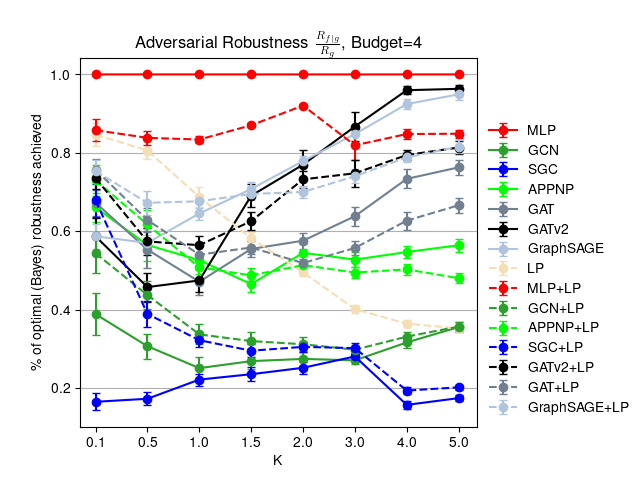

In [17]:
models = ["GCN", "GAT", "GATv2", "SGC", "MLP", "GraphSAGE", "APPNP", "LP", "APPNP+LP","GCN+LP", "GAT+LP", "GATv2+LP","MLP+LP", "GraphSAGE+LP", "SGC+LP"]
#models = ["GAT", "GAT+LP"]#, "GATv2", "GATv2+LP", "GraphSAGE", "GraphSAGE+LP"]
title = r"Adversarial Robustness $\frac{R_{f|g}}{R_{g}}$, Budget=4"
ylabel = "\% of optimal (Bayes) robustness achieved"
experiment_manager.plot(name="adversarial-robustness", attack="nettack", models=models, 
                        errorbars=True, title=title, spacing="even", ylabel=ylabel,
                        legend_loc="lower left", legend_cols=1, budget=4,
                        K_l=[0.1, 0.5, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0])

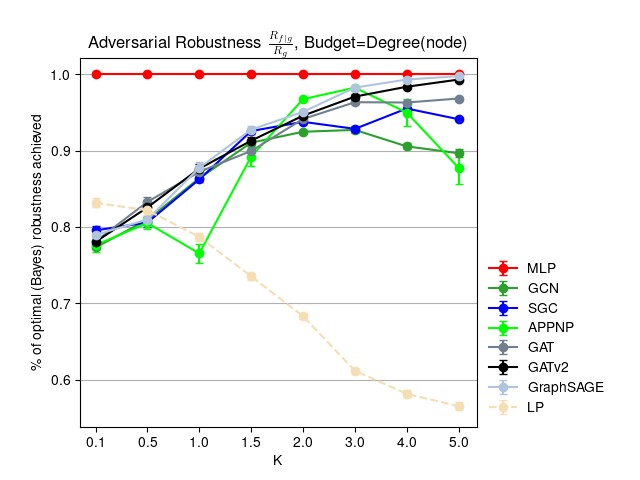

In [31]:
models = ["GCN", "GAT", "GATv2", "SGC", "MLP", "GraphSAGE", "APPNP", "LP"]
title = r"Adversarial Robustness $\frac{R_{f|g}}{R_{g}}$, Budget=Degree(node)"
ylabel = "\% of optimal (Bayes) robustness achieved"
experiment_manager.plot(name="adversarial-robustness", attack="l2-weak", models=models, 
                        errorbars=True, title=title, spacing="even", ylabel=ylabel,
                        legend_loc="lower left", legend_cols=1, budget="deg+0",
                        K_l=[0.1, 0.5, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0])

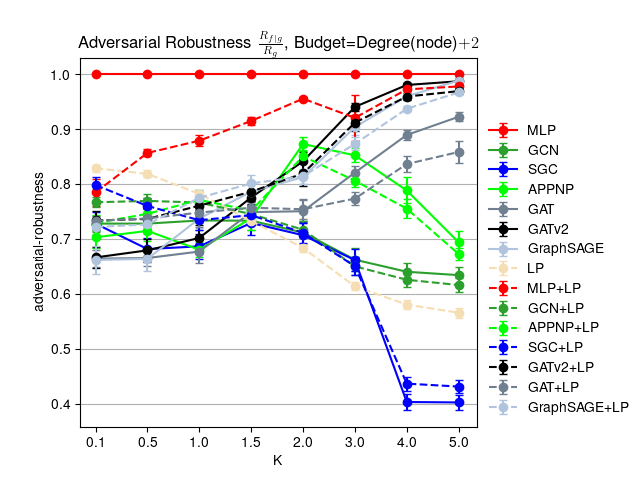

In [26]:
models = ["GCN", "GAT", "GATv2", "SGC", "MLP", "GraphSAGE", "APPNP", "LP", "APPNP+LP","GCN+LP", "GAT+LP", "GATv2+LP","MLP+LP", "GraphSAGE+LP", "SGC+LP"]
title = r"Adversarial Robustness $\frac{R_{f|g}}{R_{g}}$, Budget=Degree(node)$+2$"
ylabel = "\% of optimal (Bayes) robustness achieved"
experiment_manager.plot(name="adversarial-robustness", attack="l2", models=models, 
                        errorbars=True, title=title, spacing="even", 
                        legend_loc="lower left", legend_cols=1, budget="deg+0",
                        K_l=[0.1, 0.5, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0])

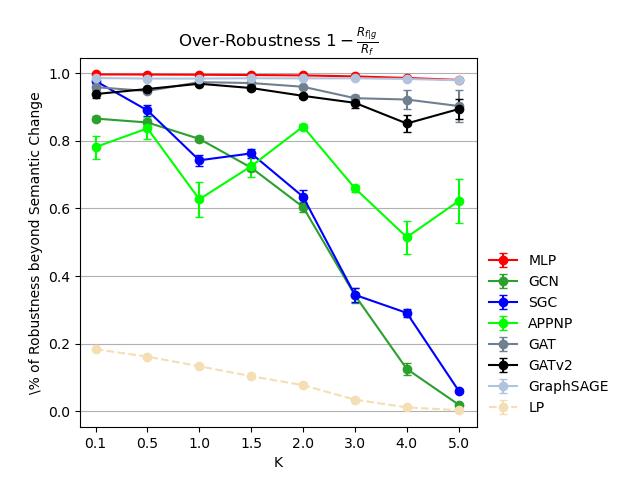

In [4]:
#models = ["GCN", "GAT", "GATv2", "SGC", "MLP", "GraphSAGE", "APPNP", "LP", "APPNP+LP","GCN+LP", "GAT+LP", "GATv2+LP","MLP+LP", "GraphSAGE+LP", "SGC+LP"]
models = ["GCN", "GAT", "GATv2", "SGC", "MLP", "GraphSAGE", "APPNP", "LP"]
title = r"Over-Robustness $1 - \frac{R_{f|g}}{R_f}$"
ylabel = "\% of Robustness beyond Semantic Change"
experiment_manager.plot(name="over-robustness-v2", attack="l2-weak", models=models, 
                        errorbars=True, title=title, spacing="even", ylabel=ylabel,
                        legend_loc="lower left", legend_cols=1,
                        K_l=[0.1, 0.5, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0])

/nfs/homedirs/gosl/src/csbm/notebooks/robustness/utils.py:1247: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontsize=13)
/nfs/homedirs/gosl/src/csbm/notebooks/robustness/utils.py:1248: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), fontsize=13)


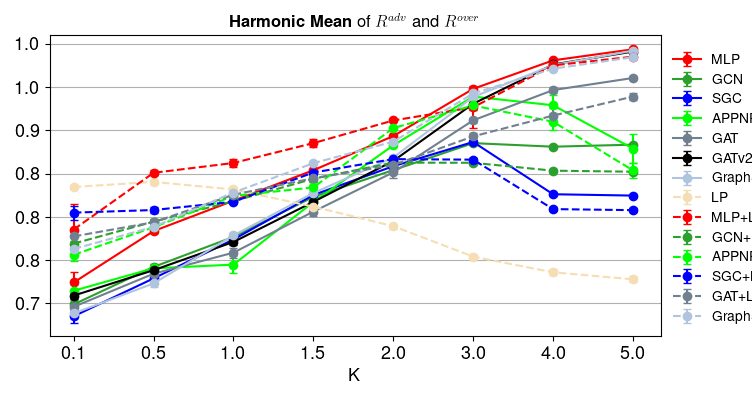

In [68]:
models = ["GCN", "GAT", "GATv2", "SGC", "APPNP", "GraphSAGE", "MLP", "LP", "APPNP+LP","GCN+LP", "GAT+LP", "GraphSAGE+LP", "MLP+LP", "SGC+LP"]
title = r"\textbf{Harmonic Mean} of $R^{adv}$ and $R^{over}$"
experiment_manager.plot_f1(name="f1-robustness-v2", attack_overrobustness="l2-weak", 
                           attack_advrobustness="random", models=models, 
                           errorbars=True, title=title, spacing="even",
                           budget="deg+0",legend_loc="lower left",
                           K_l=[0.1, 0.5, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0])

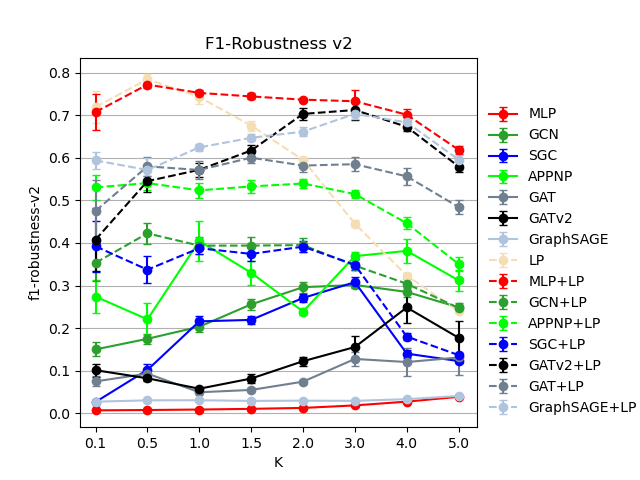

In [72]:
models = ["GCN", "GAT", "GATv2", "SGC", "MLP", "GraphSAGE", "APPNP", "LP", "APPNP+LP","GCN+LP", "GAT+LP", "GATv2+LP", "MLP+LP", "GraphSAGE+LP", "SGC+LP"]
title = "F1-Robustness v2"
experiment_manager.plot_f1(name="f1-robustness-v2", attack_overrobustness="l2-weak", 
                           attack_advrobustness="nettack", models=models, 
                           errorbars=True, title=title, spacing="even",
                           legend_loc="lower left",
                           K_l=[0.1, 0.5, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0])

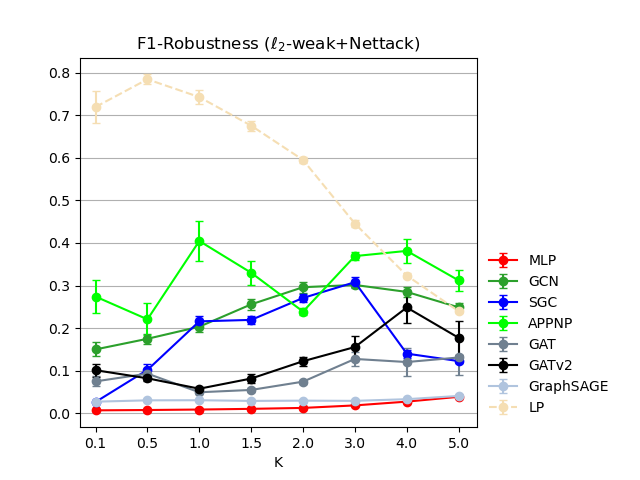

In [6]:
#models = ["GCN", "GAT", "GATv2", "SGC", "MLP", "GraphSAGE", "APPNP", "LP", "APPNP+LP","GCN+LP", "GAT+LP", "GATv2+LP","MLP+LP", "GraphSAGE+LP", "SGC+LP"]
models = ["GCN", "GAT", "GATv2", "SGC", "MLP", "GraphSAGE", "APPNP", "LP"]
title = "F1-Robustness ($\ell_2$-weak+Nettack)"
ylabel = ""
experiment_manager.plot_f1(name="f1-robustness-v2", attack_overrobustness="l2-weak", 
                           attack_advrobustness="nettack", models=models, ylabel=ylabel,
                           errorbars=True, title=title, spacing="even",
                           legend_loc="lower left",
                           K_l=[0.1, 0.5, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0])

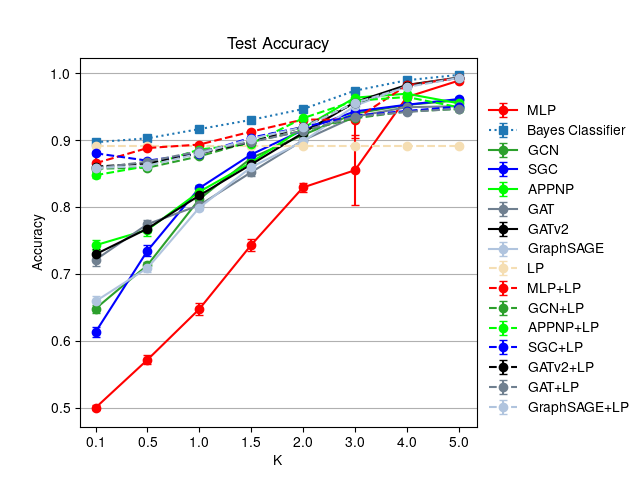

In [57]:
models = ["GCN", "GAT", "GATv2", "SGC", "MLP", "BC","GraphSAGE", "APPNP", "LP", "APPNP+LP","GCN+LP", "GAT+LP", "GATv2+LP","MLP+LP", "GraphSAGE+LP", "SGC+LP"]
title = r"Test Accuracy"
ylabel = "Accuracy"
experiment_manager.plot(name="test-accuracy", attack="l2", models=models, 
                        errorbars=True, title=title, ylabel=ylabel,
                        spacing="even", legend_loc="lower left", legend_cols=1,
                        K_l=[0.1, 0.5, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0])

/nfs/homedirs/gosl/src/csbm/notebooks/robustness/utils.py:790: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f"{round(i, 1):.1f}" for i in ax.get_yticks()], fontsize=15, fontweight="bold")


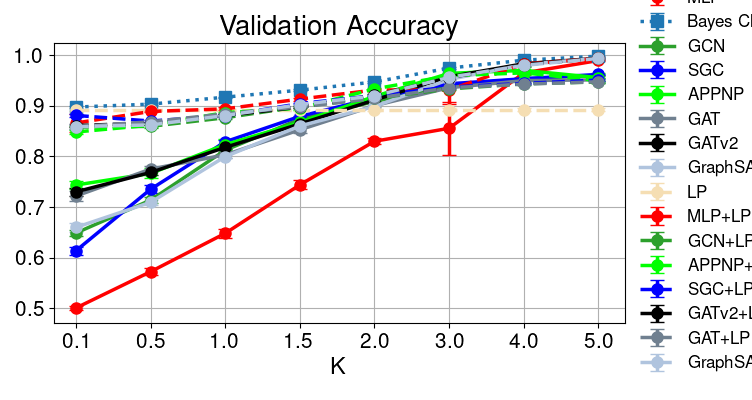

In [38]:
models = ["GCN", "GAT", "GATv2", "SGC", "BC","MLP", "GraphSAGE", "APPNP", "LP", "APPNP+LP","GCN+LP", "GAT+LP", "GATv2+LP","MLP+LP", "GraphSAGE+LP", "SGC+LP"]
title = r"Validation Accuracy"
ylabel = ""
experiment_manager.plot(name="test-accuracy", attack="l2", models=models, 
                        errorbars=True, title=title, ylabel=ylabel,
                        spacing="even",legend_loc="lower left", legend_cols=1,
                        K_l=[0.1, 0.5, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0])

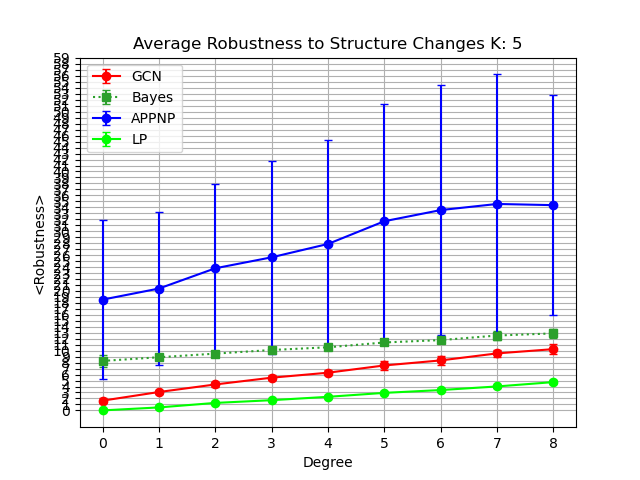

In [16]:
models = ["GCN", "APPNP", "LP"]
ylabel = "<Robustness>"
K = 5
title = f"Average Robustness to Structure Changes K: {K}"
experiment_manager.plot_wrt_degree(name="f_wrt_y", attack="l2-weak", models=models, max_degree=8, K=K, errorbars=True, title=title, ylabel=ylabel)

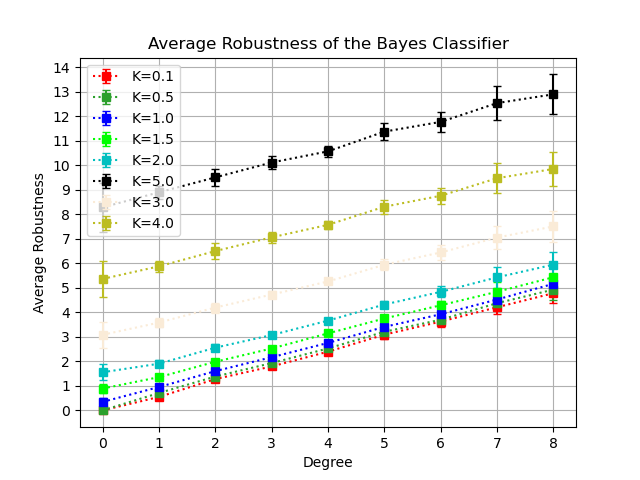

In [87]:
models = ["GCN"]
ylabel = "Average Robustness"
K = [0.1, 0.5, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0]
title = f"Average Robustness to Structure Changes K: {K}"
experiment_manager.plot_wrt_degree(name="g_wrt_y", attack="l2-weak", models=models, max_degree=8, K=K, errorbars=True, title=title, ylabel=ylabel)

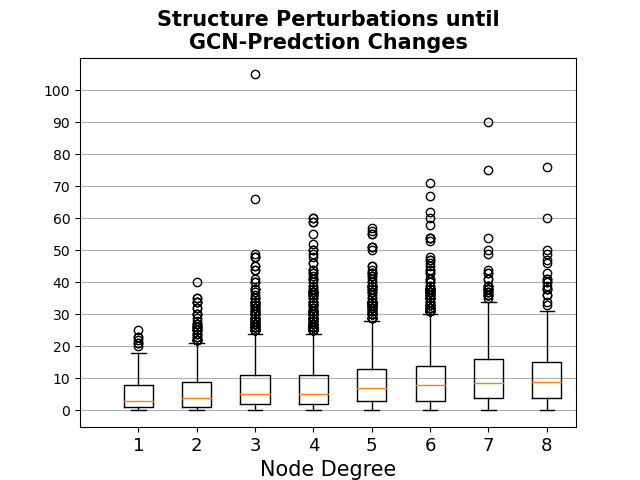

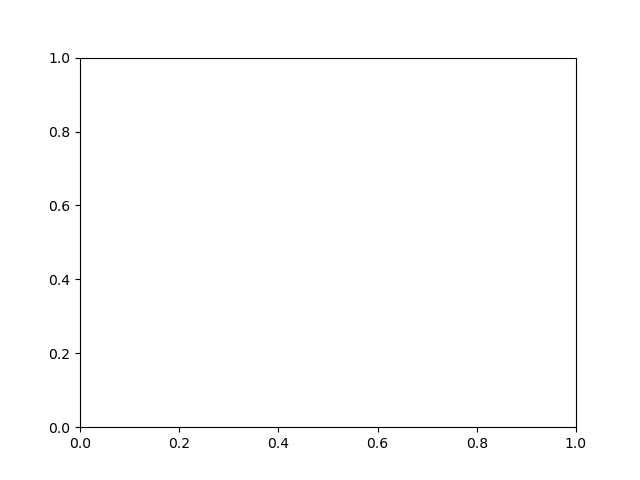

In [104]:
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "Helvetica"
})
models = ["GCN"]
ylabel = ""
K = 1.5
title = f"Structure Perturbations until\nGCN-Predction Changes"
experiment_manager.boxplot_wrt_degree_raw(name="f_wrt_y", attack="l2-weak", models=models, K=K, errorbars=True, title=title, ylabel=ylabel)